In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
filename = '../data/interim/rfmtable.csv' 

In [15]:
# Parameters
filename = "../data/interim/rfmtable.csv"


In [8]:
import papermill as pm

In [16]:
data = pd.read_csv(filename)

In [17]:
cluster_map = {0:'Champions', 1:'Potential Loyalist', 2:'Loyal Customers', 3:'Cant Lose Them'}

In [18]:
data['cluster'] = data['cluster'].map(cluster_map)

In [19]:
data1 = data[['recency','frequency','monetary','cluster']]

In [20]:
df_melt = data1.melt(['cluster'], var_name='Metrics', value_name='measure')

# Distribution Analysis of Customer Groups
### Which group is the golden goose?

Below, according to the spending behaviour of our customers, the model has predicted 4 kinds of customer groups.
- Champions - They buy the most often and spend the most amount of money.
- Loyal customers - They buy often but don't spend much on their purchases. They could potentially be loyal customers if we introduce an intervention such as a discount.
- Can't Lose Them - They have a history of making big purchases and buys often quite some time ago, but since have not made any purchases.
- Potential Loyalist - Recent customers, they spend good money and have bought more than once.

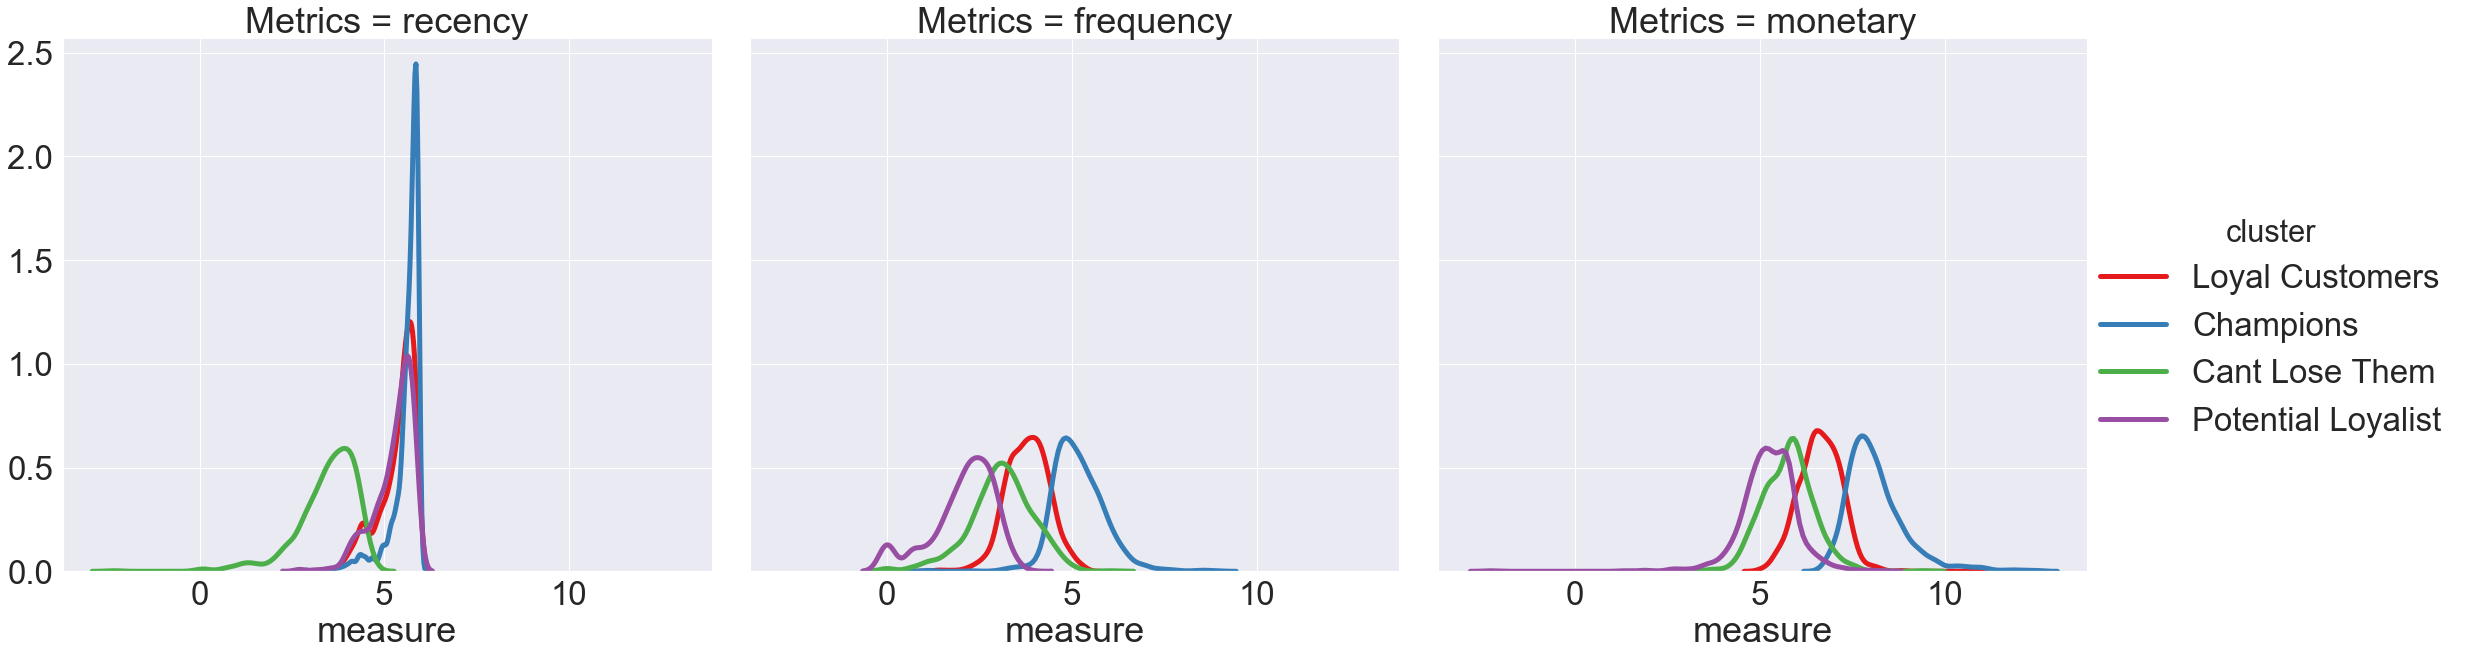

In [30]:
sns.set(font_scale=3)
g = sns.FacetGrid(df_melt, col='Metrics', hue='cluster',palette='Set1', height=10, aspect=1)
g = (g.map(sns.distplot, "measure", hist=False, label='cluster', kde_kws=dict(linewidth=5)))
g.add_legend();

# Clustering of customer

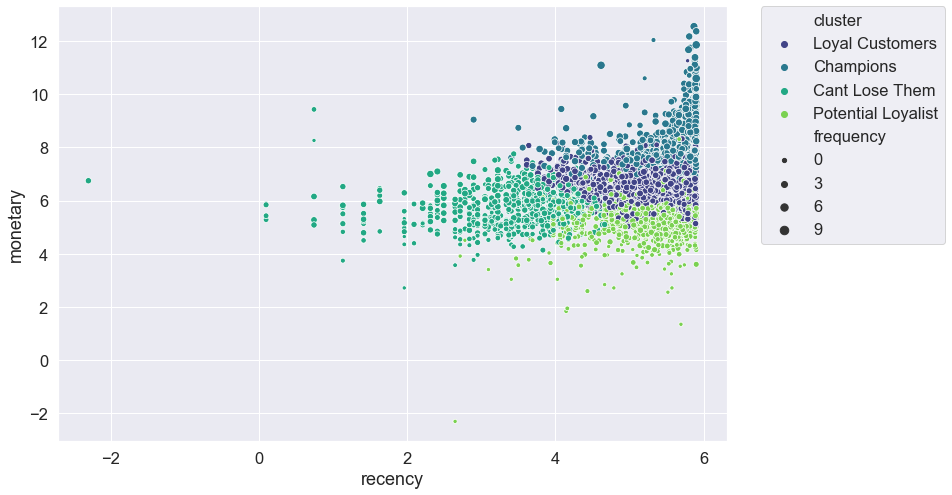

In [35]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.scatterplot('recency', 'monetary', size='frequency', hue='cluster', data=data, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);